In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Data Preparation

In [2]:
df = pd.read_csv('inpatientCharges.csv')

In [3]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [4]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [6]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [7]:
# Change df type and transfer spending amount with dollar sign into numeric
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [8]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44


In [9]:
df.describe()

,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
count,163065.000000,163065.000000,163065.000000,163065.000000
mean,47938.121908,42.776304,9707.473804,8494.490964
std,27854.323080,51.104042,7664.642598,7309.467261
min,1040.000000,11.000000,2673.000000,1148.900000
25%,27261.000000,17.000000,5234.500000,4192.350000
50%,44309.000000,27.000000,7214.100000,6158.460000
75%,72901.000000,49.000000,11286.400000,10056.880000
max,99835.000000,3383.000000,156158.180000,154620.810000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## 2. EDA for Selected Variables

### 2.1 Relation between Provider Payments and Average Medicare Payments

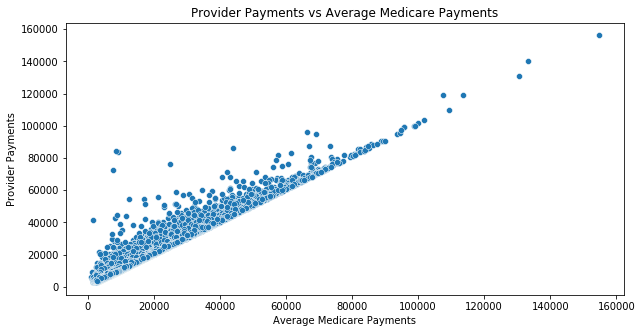

In [11]:
# Plotting a scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Average_Medicare_Payment', y='Average_Total_Payments', data=df)
plt.title('Provider Payments vs Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Provider Payments')
plt.show()


The scatterplot serves as a valuable tool for healthcare providers, allowing them to gain a clear understanding of how their payment amounts compare to the average Medicare payments. By examining the plot, providers can easily identify whether their payment amounts are significantly higher than the average. If such a discrepancy exists, it becomes crucial for providers to delve deeper into the reasons behind it and take proactive measures to reduce costs. This analysis empowers providers to optimize their financial operations and ensure they are aligned with industry standards.

### Provider Payments vs. Medicare Payments (with hue)

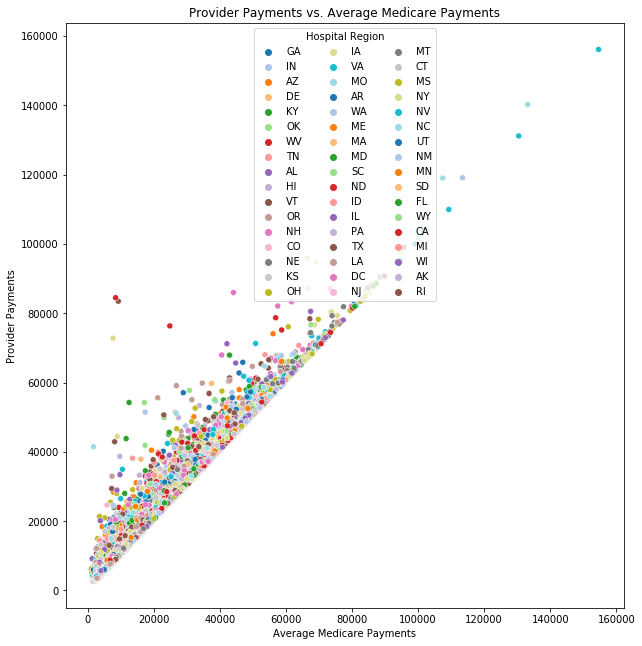

In [12]:
plt.figure(figsize=(10, 5))
scatterplot = sns.scatterplot(x='Average_Medicare_Payment', y='Average_Total_Payments', hue='Hospital_referral_region_desp', data=df, palette='tab20')
plt.title('Provider Payments vs. Average Medicare Payments')
plt.xlabel('Average Medicare Payments')
plt.ylabel('Provider Payments')

# Simplify data labels
handles, labels = scatterplot.get_legend_handles_labels()
new_labels = [label.split('-')[0].strip() for label in labels]
unique_labels = list(set(new_labels))  # Remove duplicates

# Set the number of columns for the legend
num_columns = 3
num_labels = len(unique_labels)
num_rows = num_labels // num_columns + (num_labels % num_columns > 0)

# Create a dictionary
label_handle_dict = dict(zip(unique_labels, handles))

# Create a custom legend
legend = scatterplot.legend(handles=[label_handle_dict[label] for label in unique_labels], labels=unique_labels, title='Hospital Region', ncol=num_columns, loc='upper center')

# Adjust the legend layout
plt.subplots_adjust(top=0.9 + 0.05 * num_rows)

plt.show()

The scatterplot with different colors representing hospital regions provides valuable business insights. It allows us to visually analyze the relationship between provider payments and average Medicare payments based on hospital referral regions. By observing the distribution of data points across the plot, we can identify any patterns or clusters that may indicate variations in payment trends or healthcare practices across different regions. This information can aid healthcare providers, policymakers, and insurance companies in understanding regional payment dynamics and potentially identifying areas for improvement, cost reduction, or targeted interventions.

### 2.2 Analysis of unique DRGs

In [13]:
# Calculate unique DRGs
unique_DRGs = len(df['DRG'].unique())
print("Number of unique DRGs:", unique_DRGs)

Number of unique DRGs: 100


Analyzing the variations in DRGs can help identify the breadth of medical services provided and highlight areas where specialization may be required. It can aid healthcare providers in evaluating their service offerings and identifying opportunities for expansion or improvement.

### 2.3  Total Discharges Distribution

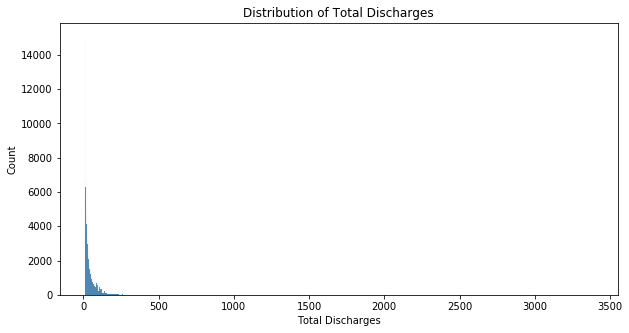

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Discharges'])
plt.title('Distribution of Total Discharges')
plt.xlabel('Total Discharges')
plt.ylabel('Count')
plt.show()

The histogram reveals a skewed distribution of "Total Discharges" with a majority of samples having lower values. This suggests that a significant portion of healthcare providers handle fewer patient discharges. Understanding this distribution is crucial for resource allocation and optimizing healthcare services to meet patient demand.

### 2.4 Correlation Heatmap

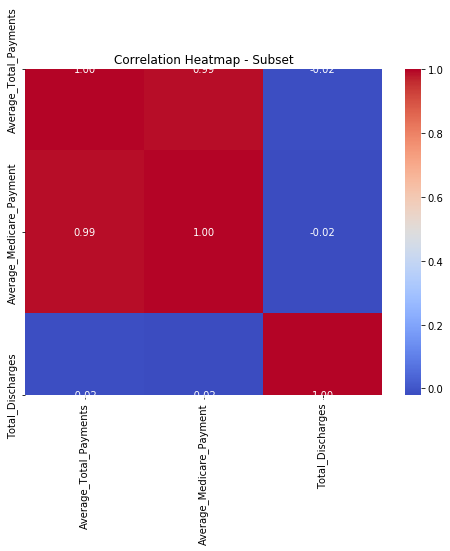

In [15]:
subset_columns = ['Average_Total_Payments', 'Average_Medicare_Payment', 'Total_Discharges']

subset_corr = df[subset_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Subset')
plt.show()


The correlation heatmap provides insights into the relationships among the selected variables: Average Total Payments, Average Medicare Payments, and Total Discharges. This information can help identify any potential correlations or dependencies between these variables in the healthcare industry.

## 3. Feature Engineering

In [16]:
# Statewise_Average_Discharge
state_avg_discharge = df.groupby('Provider_State')['Total_Discharges'].mean()
df = df.merge(state_avg_discharge, on='Provider_State', suffixes=('', '_State_Avg_Discharge'))

In [17]:
state_avg_discharge

Provider_State
AK    26.588745
AL    39.258322
AR    41.978229
AZ    36.690284
CA    36.357854
CO    32.444444
CT    47.865738
DC    43.954545
DE    67.901015
FL    48.127208
GA    38.494767
HI    26.497738
IA    39.667820
ID    33.203267
IL    45.720445
IN    42.857512
KS    37.728938
KY    47.250542
LA    36.298646
MA    50.411244
MD    51.955255
ME    37.290541
MI    54.539952
MN    42.480462
MO    44.056664
MS    38.681743
MT    31.037549
NC    51.043841
ND    38.921801
NE    37.475518
NH    34.530984
NJ    52.052839
NM    29.362050
NV    35.440932
NY    47.456635
OH    41.852824
OK    38.607937
OR    30.443418
PA    40.355715
RI    37.906463
SC    42.638918
SD    41.376543
TN    45.361084
TX    40.453388
UT    31.491803
VA    44.644275
VT    37.300000
WA    38.520878
WI    35.309809
WV    40.886092
WY    26.457490
Name: Total_Discharges, dtype: float64

Reflects general hospital discharge rates per state. Not a benchmark as discharge rates can be affected by external factors, not just hospital efficiency.

In [18]:
#2. DRG_Average_Medicare_Payment
drg_avg_medicare_payment = df.groupby('DRG')['Average_Medicare_Payment'].mean()
df = df.merge(drg_avg_medicare_payment, on='DRG', suffixes=('', '_DRG_Avg_Medicare'))

In [19]:
drg_avg_medicare_payment

DRG
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC                                      5555.837525
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC                           5701.676570
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC                   12112.849445
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC                     6781.501785
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC               4469.203560
                                                                                 ...     
885 - PSYCHOSES                                                               5864.125644
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC     3999.917704
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                                9566.820747
918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                              3530.394718
948 - SIGNS & SYMPTOMS W/O MCC                                                3911.244997
Name: 

DRG_Average_Medicare_Payment: Reflects the costliness of each DRG from Medicare's perspective. Not a benchmark since it doesn't consider individual provider costs or patient outcomes.

In [20]:
# 3. Citywise_Average_Total_Payments
city_avg_payments = df.groupby('Provider_City')['Average_Total_Payments'].mean()
df = df.merge(city_avg_payments, on='Provider_City', suffixes=('', '_City_Avg'))

In [21]:
city_avg_payments

Provider_City
ABBEVILLE       6663.217222
ABERDEEN        9327.920561
ABILENE         8994.949539
ABINGDON        7173.921270
ABINGTON       10321.999293
                   ...     
ZANESVILLE      8932.169271
ZEELAND         6736.034545
ZEPHYRHILLS     7613.083125
ZION           13013.765000
ZUNI            9500.750000
Name: Average_Total_Payments, Length: 1977, dtype: float64

Citywise_Average_Total_Payments: Shows the average cost of healthcare in each city. Not a benchmark as prices can fluctuate due to factors like location and patient demographics.

In [22]:
# 4. Provider_Payment_Difference
# Calculate state-wise average total payments
state_avg_payments = df.groupby('Provider_State')['Average_Total_Payments'].mean()

# Merge state average payments back into the DataFrame
df = df.merge(state_avg_payments, on='Provider_State', suffixes=('', '_State_Avg'))

# Calculate Provider_Payment_Difference
df['Provider_Payment_Difference'] = df['Average_Total_Payments'] - df['Average_Total_Payments_State_Avg']

# Calculate DRG_Payment_Ratio
df['DRG_Payment_Ratio'] = df['Average_Total_Payments'] / df['Average_Total_Payments'].mean()


In [23]:
df['Provider_Payment_Difference'] 

0         -1790.992149
1         -2211.952149
2         -2673.472149
3         -2714.232149
4         -3562.002149
              ...     
163060    -4272.228004
163061    14090.021996
163062     1862.151996
163063     1894.241996
163064    -4605.688004
Name: Provider_Payment_Difference, Length: 163065, dtype: float64

Provider_Payment_Difference: Indicates whether a provider's charges are above the state average. Not a benchmark as higher costs could reflect higher quality care or more complex cases.

In [24]:
# 5.DRG_Payment_Ratio
# Calculate DRG-wise average total payments
drg_avg_payments = df.groupby('DRG')['Average_Total_Payments'].mean()

# Merge DRG average payments back into the DataFrame
df = df.merge(drg_avg_payments, on='DRG', suffixes=('', '_DRG_Avg'))

# Calculate Provider_Payment_Difference
df['Provider_Payment_Difference'] = df['Average_Total_Payments'] - df['Average_Total_Payments_DRG_Avg']

# Calculate DRG_Payment_Ratio
df['DRG_Payment_Ratio'] = df['Average_Total_Payments'] / df['Average_Total_Payments_DRG_Avg']


In [25]:
df['DRG_Payment_Ratio'] 

0         0.830000
1         0.769521
2         0.831484
3         0.780824
4         0.778325
            ...   
163060    1.344512
163061    0.885732
163062    0.978298
163063    0.919504
163064    1.042286
Name: DRG_Payment_Ratio, Length: 163065, dtype: float64

DRG_Payment_Ratio: Shows if a provider charges more for a DRG than the average. Not a benchmark because a higher ratio could be due to treating more complex cases within that DRG.

In [26]:
# 6. DRG_Count_in_State
drg_count_state = df.groupby(['Provider_State', 'DRG']).size().reset_index(name='DRG_Count_in_State')
df = df.merge(drg_count_state, on=['Provider_State', 'DRG'])

In [27]:
drg_count_state 

,Provider_State,DRG,DRG_Count_in_State
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4
...,...,...,...
5095,WY,885 - PSYCHOSES,0
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,1
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,1
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,2


In [28]:
# 7. Citywise_Average_Medicare_Payment
city_avg_medicare_payment = df.groupby('Provider_City')['Average_Medicare_Payment'].mean().reset_index(name='Citywise_Average_Medicare_Payment')
df = df.merge(city_avg_medicare_payment, on='Provider_City')


In [29]:
city_avg_medicare_payment

,Provider_City,Citywise_Average_Medicare_Payment
0,ABBEVILLE,5936.423333
1,ABERDEEN,8338.016168
2,ABILENE,7558.788618
3,ABINGDON,6156.648571
4,ABINGTON,9072.775556
...,...,...
1972,ZANESVILLE,7632.901354
1973,ZEELAND,5499.131818
1974,ZEPHYRHILLS,6575.635750
1975,ZION,4626.235000


The average Medicare payment in each city. Like the statewise feature, it captures geographical cost variations but at a more granular level. Not a benchmark because it varies by city.

In [30]:
# 8. Statewise_Max_Total_Payments
state_max_payments = df.groupby('Provider_State')['Average_Total_Payments'].max().reset_index(name='Statewise_Max_Total_Payments')
df = df.merge(state_max_payments, on='Provider_State')


In [31]:
state_max_payments

,Provider_State,Statewise_Max_Total_Payments
0,AK,77566.38
1,AL,48198.38
2,AR,57325.95
3,AZ,71437.35
4,CA,156158.18
5,CO,68294.66
6,CT,73887.44
7,DC,99067.50
8,DE,50707.91
9,FL,73454.80


This feature represents the average Medicare payment for each state. It can capture geographical differences in healthcare costs. Not a benchmark since it's specific to each state.

In [32]:
# 9. DRGwise_Min_Medicare_Payment
drg_min_medicare_payment = df.groupby('DRG')['Average_Medicare_Payment'].min().reset_index(name='DRGwise_Min_Medicare_Payment')
df = df.merge(drg_min_medicare_payment, on='DRG')

In [33]:
drg_min_medicare_payment

,DRG,DRGwise_Min_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,3592.85
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,3116.42
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6603.63
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4109.25
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2771.88
...,...,...
95,885 - PSYCHOSES,1978.60
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,1878.83
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,5137.27
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1603.83


The total number of discharges for each DRG. May reveal procedures that are done more often. Not a benchmark since it's specific to each DRG.

In [34]:
# 10.Hospital_Service_Volume
hospital_service_volume = df.groupby('Provider_Id')['Total_Discharges'].sum().reset_index(name='Hospital_Service_Volume')
df = df.merge(hospital_service_volume, on='Provider_Id')

In [35]:
hospital_service_volume 

,Provider_Id,Hospital_Service_Volume
0,10001,5405
1,10005,1419
2,10006,3901
3,10007,603
4,10008,161
...,...,...
3332,670072,553
3333,670073,219
3334,670075,81
3335,670076,18


The average total payment for each DRG. Shows the typical cost for different procedures. Not a benchmark as it varies by DRG.

The difference between a specific payment and the average total payment for that DRG. Helps identify unusually high or low costs for a procedure. Not a benchmark as it's specific to each payment and DRG.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 23 columns):
 #   Column                                     Non-Null Count   Dtype   
---  ------                                     --------------   -----   
 0   DRG                                        163065 non-null  category
 1   Provider_Id                                163065 non-null  category
 2   Provider_Name                              163065 non-null  object  
 3   Provider_StreetAddress                     163065 non-null  object  
 4   Provider_City                              163065 non-null  category
 5   Provider_State                             163065 non-null  category
 6   Provider_Zipcode                           163065 non-null  int64   
 7   Hospital_referral_region_desp              163065 non-null  object  
 8   Total_Discharges                           163065 non-null  int64   
 9   Average_Total_Payments                     163065 non-null  float64 
 

In [37]:
df.describe()

,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Discharges_State_Avg_Discharge,Average_Medicare_Payment_DRG_Avg_Medicare,Average_Total_Payments_City_Avg,Average_Total_Payments_State_Avg,Provider_Payment_Difference,DRG_Payment_Ratio,Average_Total_Payments_DRG_Avg,DRG_Count_in_State,Citywise_Average_Medicare_Payment,Statewise_Max_Total_Payments,DRGwise_Min_Medicare_Payment,Hospital_Service_Volume
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,1.630650e+05,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,47938.121908,42.776304,9707.473804,8494.490964,42.776304,8494.490964,9707.473804,9707.473804,-3.141247e-14,1.000000,9707.473804,72.747095,8494.490964,85168.378484,4747.672630,3281.562181
std,27854.323080,51.104042,7664.642598,7309.467261,5.874590,6685.528070,2274.636602,1386.469166,3.086325e+03,0.248259,7015.792522,55.030416,2209.348121,30586.213435,3522.320614,2395.821491
min,1040.000000,11.000000,2673.000000,1148.900000,26.457490,2876.015593,3623.440000,7568.232149,-2.372285e+04,0.464005,3912.283709,1.000000,2872.330000,39845.680000,1148.900000,11.000000
25%,27261.000000,17.000000,5234.500000,4192.350000,38.520878,4437.804065,8284.709767,8808.127651,-1.204155e+03,0.839686,5493.361883,32.000000,7099.879583,64668.660000,2456.830000,1555.000000
50%,44309.000000,27.000000,7214.100000,6158.460000,41.852824,6132.341256,9411.176543,9243.979573,-5.043133e+02,0.928391,7110.467094,58.000000,8180.998548,73887.440000,3563.630000,2793.000000
75%,72901.000000,49.000000,11286.400000,10056.880000,47.456635,10543.478465,10702.095684,10279.981536,6.559079e+02,1.085989,11576.152711,100.000000,9400.506082,95868.640000,5827.000000,4462.000000
max,99835.000000,3383.000000,156158.180000,154620.810000,67.901015,41899.432929,42446.710000,14572.391732,1.175693e+05,9.449417,44259.485463,273.000000,39943.165000,156158.180000,19673.710000,25828.000000


### Summary
In anomaly detection, these features offer invaluable business and data insights. Statewise_Average_Discharge reveals operational anomalies within hospitals, potentially indicating patient care issues or inefficiencies. DRG_Average_Medicare_Payment can spotlight unusual payments, suggesting fraudulent activities or underpayment issues. Citywise_Average_Total_Payments uncovers geographic disparities in healthcare costs. Provider_Payment_Difference and DRG_Payment_Ratio provide a comparative view of payment practices among providers, highlighting possible overpricing or efficiency. Thus, these features form a holistic tool for spotting irregularities in healthcare services that could affect patient care, operational efficacy, and financial stability.

The discussed aspects in the article boost my feature engineering and EDA process by encouraging scalability and adaptability. The approach of handling various healthcare areas helps in crafting robust and generalized features. Meanwhile, the customization aspect aids in conducting a detailed and specific EDA, enhancing my understanding of data patterns and trends. Furthermore, the focus on cost-effective fraud detection offers insights into designing features capable of identifying anomalies efficiently, optimizing my data usage.

## New Features

(10.999, 13.0]    21792
(33.0, 43.0]      17107
(18.0, 22.0]      17105
(22.0, 27.0]      16669
(43.0, 58.0]      16007
(88.0, 3383.0]    15973
(58.0, 88.0]      15862
(15.0, 18.0]      15628
(27.0, 33.0]      14820
(13.0, 15.0]      12102
Name: Total_Discharges_bin, dtype: int64
(4874.14, 5604.472]       16307
(2672.999, 4233.662]      16307
(10236.564, 12538.0]      16307
(6352.196, 7214.1]        16307
(17279.736, 156158.18]    16307
(5604.472, 6352.196]      16306
(4233.662, 4874.14]       16306
(7214.1, 8466.838]        16306
(12538.0, 17279.736]      16306
(8466.838, 10236.564]     16306
Name: Average_Total_Payments_bin, dtype: int64
(3834.966, 4567.666]              16307
(1148.8990000000001, 3222.618]    16307
(9115.99, 11162.89]               16307
(5308.524, 6158.46]               16307
(15695.634, 154620.81]            16307
(4567.666, 5308.524]              16306
(3222.618, 3834.966]              16306
(6158.46, 7425.842]               16306
(11162.89, 15695.634]           

<Figure size 720x432 with 0 Axes>

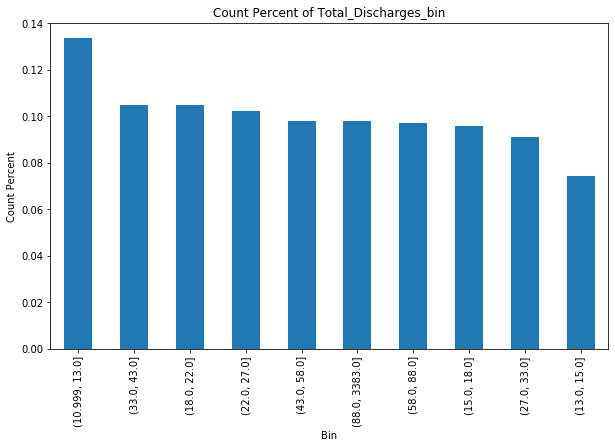

Mean calculation skipped for Average_Total_Payments_bin (categorical variable)
Mean calculation skipped for Average_Medicare_Payment_bin (categorical variable)


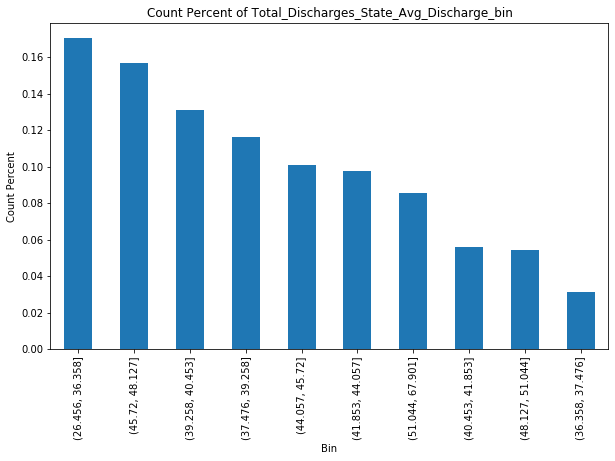

Mean calculation skipped for Average_Medicare_Payment_DRG_Avg_Medicare_bin (categorical variable)
Mean calculation skipped for Average_Total_Payments_City_Avg_bin (categorical variable)
Mean calculation skipped for Average_Total_Payments_State_Avg_bin (categorical variable)
Mean calculation skipped for Provider_Payment_Difference_bin (categorical variable)
Mean calculation skipped for DRG_Payment_Ratio_bin (categorical variable)
Mean calculation skipped for Average_Total_Payments_DRG_Avg_bin (categorical variable)
Mean calculation skipped for DRG_Count_in_State_bin (categorical variable)
Mean calculation skipped for Citywise_Average_Medicare_Payment_bin (categorical variable)
Mean calculation skipped for Statewise_Max_Total_Payments_bin (categorical variable)
Mean calculation skipped for DRGwise_Min_Medicare_Payment_bin (categorical variable)


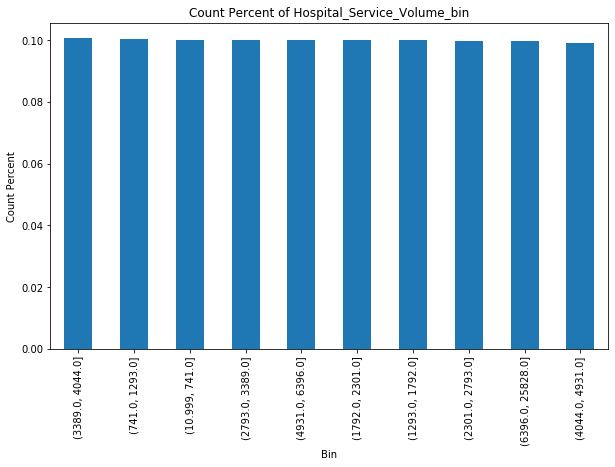

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Binning function
def binning(var):
    df[var + '_bin'] = pd.qcut(df[var], 10, duplicates='drop').values.add_categories("NoData")
    df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
    print(df[var + '_bin'].value_counts(dropna=False))


# Features to perform binning on
features = ['Total_Discharges', 'Average_Total_Payments', 'Average_Medicare_Payment',
            'Total_Discharges_State_Avg_Discharge', 'Average_Medicare_Payment_DRG_Avg_Medicare',
            'Average_Total_Payments_City_Avg', 'Average_Total_Payments_State_Avg',
            'Provider_Payment_Difference', 'DRG_Payment_Ratio', 'Average_Total_Payments_DRG_Avg',
            'DRG_Count_in_State', 'Citywise_Average_Medicare_Payment', 'Statewise_Max_Total_Payments',
            'DRGwise_Min_Medicare_Payment', 'Hospital_Service_Volume']

# Set the figure size
plt.figure(figsize=(10, 6))

# Perform binning on each feature
for i in features:
    binning(i)

# Adding suffix _bin to new feature list
features_bin = [f + '_bin' for f in features]

# Perform EDA
for feature_bin in features_bin:
    if feature_bin in ['Total_Discharges_bin', 'Total_Discharges_State_Avg_Discharge_bin', 'Hospital_Service_Volume_bin']:
        # For categorical variables, plot only the count proportion
        counts = df[feature_bin].value_counts(normalize=True)
        fig, ax = plt.subplots(figsize=(10, 6))
        counts.plot(kind='bar', ax=ax)
        ax.set_xlabel('Bin')
        ax.set_ylabel('Count Percent')
        plt.xticks(rotation=90)
        plt.title(f"Count Percent of {feature_bin}")
        plt.show()
    else:
        print(f"Mean calculation skipped for {feature_bin} (categorical variable)")


Binning or discretizing continuous variables into categorical bins offers several benefits in data analysis and modeling. Here are some advantages of using binned features:

Simplification of data: Binning reduces the complexity of continuous data by converting it into discrete categories or intervals. This simplification can make the data more interpretable and easier to analyze.

Non-linear patterns detection: Binning allows for capturing non-linear relationships between variables. By grouping similar values into bins, you can identify patterns or trends that may not be evident when considering the raw continuous values.
Outlier identification: Binned features can help in identifying outliers or extreme values. Outliers may appear as values that fall outside the defined bins or in bins with significantly lower frequencies, making them stand out and easier to detect.

Improved model performance: Binned features can potentially enhance model performance. Some machine learning algorithms, such as decision trees or random forests, can benefit from categorical features that represent different levels or intervals rather than continuous values. Binning provides a way to transform numerical variables into categorical ones, which can improve the model's ability to capture complex relationships.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 38 columns):
 #   Column                                         Non-Null Count   Dtype   
---  ------                                         --------------   -----   
 0   DRG                                            163065 non-null  category
 1   Provider_Id                                    163065 non-null  category
 2   Provider_Name                                  163065 non-null  object  
 3   Provider_StreetAddress                         163065 non-null  object  
 4   Provider_City                                  163065 non-null  category
 5   Provider_State                                 163065 non-null  category
 6   Provider_Zipcode                               163065 non-null  int64   
 7   Hospital_referral_region_desp                  163065 non-null  object  
 8   Total_Discharges                               163065 non-null  int64   
 9   Average_Total_Payments    

### Iforest

In [127]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Select the features to use for iForest analysis
features = ['DRG', 'Provider_Id', 'Provider_Name', 'Provider_City', 'Provider_State',
            'Hospital_referral_region_desp', 'Total_Discharges', 'Average_Total_Payments',
            'Average_Medicare_Payment', 'Total_Discharges_State_Avg_Discharge',
            'Average_Medicare_Payment_DRG_Avg_Medicare', 'Average_Total_Payments_City_Avg',
            'Average_Total_Payments_State_Avg', 'Provider_Payment_Difference', 'DRG_Payment_Ratio',
            'Average_Total_Payments_DRG_Avg', 'DRG_Count_in_State', 'Citywise_Average_Medicare_Payment',
            'Statewise_Max_Total_Payments', 'DRGwise_Min_Medicare_Payment', 'Hospital_Service_Volume']

# Create a subset of the dataset with only the selected features
data = df[features]

# Instantiate the encoder
le = LabelEncoder()

# Apply the encoder to each column you want to transform
for col in ['DRG', 'Provider_Id', 'Provider_Name', 'Provider_City', 'Provider_State', 'Hospital_referral_region_desp']:
    data[col] = le.fit_transform(data[col])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=features)

# Create an instance of the Isolation Forest model
clf = IsolationForest()

# Fit the model to the scaled data
clf.fit(data_scaled)

# Predict the outlier scores for the data
outlier_scores = clf.decision_function(data_scaled)

# Convert the scores to a DataFrame
outlier_scores = pd.Series(outlier_scores, name='Outlier Score')

# Identify the outliers based on a threshold (e.g., scores below -0.2 are considered outliers)
threshold = -0.2
outliers = data_scaled[outlier_scores < threshold]

# Output the identified outliers
print(outliers)


C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\ba

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidan

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidan

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

             DRG  Provider_Id  Provider_Name  Provider_City  Provider_State  \
25057   1.458293    -0.270324      -0.434383      -1.551764       -0.288262   
61250  -0.960996     0.362938       0.220692       0.458428        0.677310   
61317   1.458293     0.362938       0.220692       0.458428        0.677310   
61318   1.492854     0.362938       0.220692       0.458428        0.677310   
62036   1.458293     0.344629       0.134356      -1.326636        0.677310   
62038   1.492854     0.344629       0.134356      -1.326636        0.677310   
63129  -0.960996     0.408171      -0.181850      -1.317773        0.677310   
63194   1.492854     0.408171      -0.181850      -1.317773        0.677310   
63476  -0.960996     0.438326       1.590199       1.495432        0.677310   
63505   0.110404     0.438326       1.590199       1.495432        0.677310   
63529   1.458293     0.438326       1.590199       1.495432        0.677310   
63530   1.492854     0.438326       1.590199       1

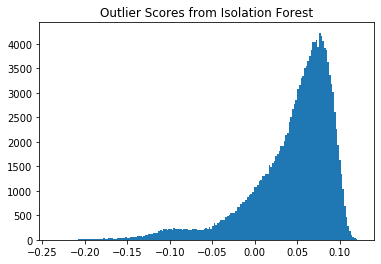

In [128]:
import matplotlib.pyplot as plt

plt.hist(outlier_scores, bins='auto')  
plt.title("Outlier Scores from Isolation Forest")
plt.show()


In [129]:
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)


# Train the iForest models
clf1 = IForest(behaviour="new", max_samples=60)
clf2 = IForest(behaviour="new", max_samples=60)
clf3 = IForest(behaviour="new", max_samples=60)

clf1.fit(X_train)
clf2.fit(X_train)
clf3.fit(X_train)

# Predict the outlier scores for the test data

y_test_scores = clf3.decision_function(X_test)
y_test_scores = pd.Series(y_test_scores)



C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:313: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(self.max_features, np.float):
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:313: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(self.max_features, np.float):
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidan

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:313: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(self.max_features, np.float):
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

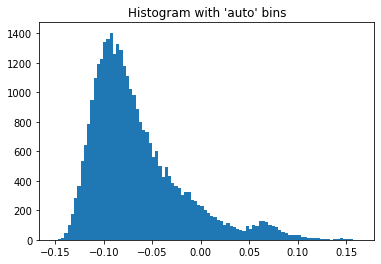

1    26593
0     6020
Name: cluster, dtype: int64
               DRG  Provider_Id  Provider_Name  Provider_City  Provider_State  \
cluster                                                                         
0        48.494518  1611.510465    1581.444518     855.356977       23.602492   
1        49.018764  1639.947618    1642.685331     989.836498       24.359155   

         Hospital_referral_region_desp  Total_Discharges  \
cluster                                                    
0                           148.648837         51.926412   
1                           152.823600         40.777460   

         Average_Total_Payments  Average_Medicare_Payment  \
cluster                                                     
0                   9669.234713               8335.704792   
1                   9693.827860               8521.941290   

         Total_Discharges_State_Avg_Discharge  ...  \
cluster                                        ...   
0                              

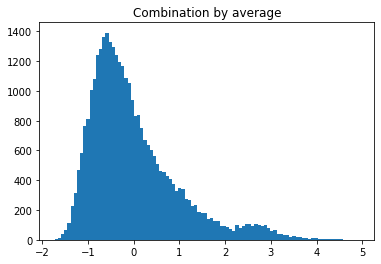

0    30849
1     1764
Name: y_by_average_cluster, dtype: int64
                            DRG  Provider_Id  Provider_Name  Provider_City  \
y_by_average_cluster                                                         
0                     48.467892  1648.763850    1626.970177     965.967357   
1                     56.863379  1388.721088    1708.517007     948.324263   

                      Provider_State  Hospital_referral_region_desp  \
y_by_average_cluster                                                  
0                          24.414017                     153.380855   
1                          20.817460                     128.831066   

                      Total_Discharges  Average_Total_Payments  \
y_by_average_cluster                                             
0                            42.857273             8392.106679   
1                            42.453515            32374.522851   

                      Average_Medicare_Payment  \
y_by_average_cluster    

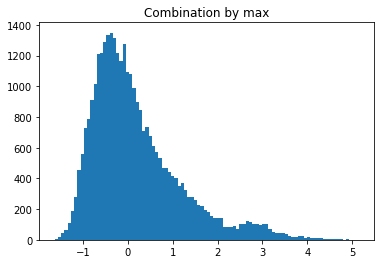

0    30492
1     2121
Name: y_by_maximization_cluster, dtype: int64
                                 DRG  Provider_Id  Provider_Name  \
y_by_maximization_cluster                                          
0                          48.428735  1654.550243    1625.593631   
1                          56.013201  1349.304102    1714.580858   

                           Provider_City  Provider_State  \
y_by_maximization_cluster                                  
0                             966.411157       24.495573   
1                             944.913720       20.250354   

                           Hospital_referral_region_desp  Total_Discharges  \
y_by_maximization_cluster                                                    
0                                             153.896169         42.663879   
1                                             125.554927         45.301744   

                           Average_Total_Payments  Average_Medicare_Payment  \
y_by_maximization_cluster 

In [130]:
# Visualize the outlier scores using a histogram
plt.hist(y_test_scores, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()

# Create a DataFrame with the outlier scores
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance'] < 0.03, 0, 1)
print(X_test_cluster['cluster'].value_counts())

# Group the test data by the cluster and calculate the mean values
grouped_data = X_test_cluster.groupby('cluster').mean()
print(grouped_data)

# Aggregate the outlier scores from multiple models using the average method
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                            'clf2': clf2.decision_function(X_test),
                            'clf3': clf3.decision_function(X_test)
                           })

train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

# Combine the scores using the average method
y_by_average = average(test_scores_norm)

# Visualize the combined scores using a histogram
plt.hist(y_by_average, bins='auto')
plt.title("Combination by average")
plt.show()

# Create a DataFrame with the combined scores
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score'] >= 2, 1, 0)
print(df_test['y_by_average_cluster'].value_counts())
print(df_test.groupby('y_by_average_cluster').mean())

# Aggregate the outlier scores from multiple models using the maximum of maximum method
y_by_maximization = maximization(test_scores_norm)

# Visualize the combined scores using a histogram
plt.hist(y_by_maximization, bins='auto')
plt.title("Combination by max")
plt.show()

# Create a DataFrame with the combined scores
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score'] >= 2, 1, 0)
print(df_test['y_by_maximization_cluster'].value_counts())
print(df_test.groupby('y_by_maximization_cluster').mean())


The analysis applied to the pharmaceutical data is focused on identifying outliers or anomalies which could represent cases of fraudulent activity, inconsistencies, or data errors within the healthcare system. The models clf1, clf2, and clf3 were utilized to assign an 'outlier score' to each record in the dataset, which comprises various features like the number of discharges, average total payments, provider payment difference, etc.

Combining these models using the average and maximum of maximum methods allowed for robust outlier detection. Visualizations via histograms offered a clear view of the score distributions, with most scores below 2, suggesting that the majority of records were 'normal.'

However, scores above the threshold of 2 were categorized as potential anomalies. This threshold can be adjusted based on the tolerance level of the business towards potential anomalies. The anomalous transactions might include unusually high total payments, significantly different provider payment rates, or abnormally high discharge rates that deviate from average patterns.

By grouping the data by 'normal' and 'anomaly' clusters and calculating the mean of each feature, valuable insights can be gained about these different groups. For instance, if the average total payment in the anomaly group is significantly higher than in the normal group, this could indicate potential overcharging or fraud.

Understanding these anomalies and their characteristics are crucial for pharmaceutical companies and healthcare providers to ensure data accuracy, financial prudence, and compliance with regulations. The findings can aid in targeted auditing, improving billing accuracy, and refining protocols to avoid future anomalies.

### Autoencoder

In [91]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

# Select the categorical and numerical features
categorical_features = ['DRG', 'Provider_Id', 'Provider_City', 'Provider_State']
numerical_features = ['Total_Discharges', 'Average_Total_Payments', 'Average_Medicare_Payment', 'Total_Discharges_State_Avg_Discharge', 'Average_Medicare_Payment_DRG_Avg_Medicare']

# Create a subset of the dataset with only the selected features
data = df[categorical_features + numerical_features]

# Instantiate the encoder
le = LabelEncoder()

# Apply the encoder to each categorical column you want to transform
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

# Standardize the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Create an instance of the Isolation Forest model
clf = IsolationForest()

# Fit the model to the data
clf.fit(data)

# Predict the outlier scores for the data
outlier_scores = clf.decision_function(data)

# Convert the scores to a DataFrame
outlier_scores = pd.Series(outlier_scores, name='Outlier Score')

# Identify the outliers based on a threshold (e.g., scores below -0.2 are considered outliers)
threshold = -0.2
outliers = data[outlier_scores < threshold]

# Output the identified outliers
print(outliers)


C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behav

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(mask_length, dtype=np.bool)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more d

C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\ensemble\bagging.py:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  random_state=random_state)
C:\Users\STEVEN H\Anaconda3\envs\week-1\lib\site-packages\sklearn\utils\__init__.py:609: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidan

        DRG  Provider_Id  Provider_City  Provider_State  Total_Discharges  \
26052    92         1399           1907              20         -0.602230   
32620    91         2111           1942              27         -0.230439   
32621    92         2111           1942              27          0.180489   
39215    91         1500             49              22         -0.073895   
39216    92         1500             49              22         -0.073895   
...     ...          ...            ...             ...               ...   
144894   91          874            792              11         -0.504390   
144903   21          875            792              11         -0.621798   
145049   91          872            775              11         -0.523958   
150749   92          322           1622               4         -0.621798   
153131   91          514            438               5         -0.602230   

        Average_Total_Payments  Average_Medicare_Payment  \
26052          

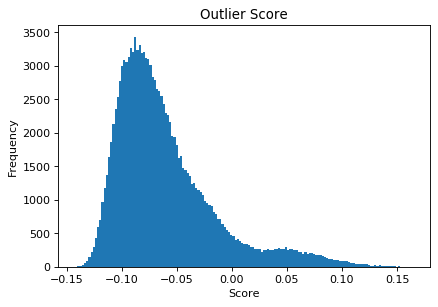

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=80)
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Outlier Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 39 columns):
 #   Column                                         Non-Null Count   Dtype   
---  ------                                         --------------   -----   
 0   DRG                                            163065 non-null  category
 1   Provider_Id                                    163065 non-null  category
 2   Provider_Name                                  163065 non-null  object  
 3   Provider_StreetAddress                         163065 non-null  object  
 4   Provider_City                                  163065 non-null  category
 5   Provider_State                                 163065 non-null  category
 6   Provider_Zipcode                               163065 non-null  int64   
 7   Hospital_referral_region_desp                  163065 non-null  object  
 8   Total_Discharges                               163065 non-null  int64   
 9   Average_Total_Payments    

In [93]:
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from sklearn.preprocessing import StandardScaler


In [94]:
# Assuming your dataset is stored in a variable called "df"
# Remove any non-numeric columns that cannot be used in the autoencoder
df_numeric = df.select_dtypes(include=[np.number])

# Perform any necessary data cleaning and preprocessing steps on df_numeric

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [95]:
# Define the hidden layer configuration for the autoencoder
hidden_neurons = [25, 10, 2, 10, 25]  # Example configuration, modify as needed

# Create an instance of the AutoEncoder model
clf = AutoEncoder(hidden_neurons=hidden_neurons)

# Train the model on your dataset
clf.fit(df_scaled)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dropout (Dropout)            (None, 17)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                306       
_________________________________________________________________
dropout_1 (Dropout)          (None, 17)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                450       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

146758/146758 [==============================] - 20s 136us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 53/100
146758/146758 [==============================] - 21s 142us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 54/100
146758/146758 [==============================] - 20s 139us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 55/100
146758/146758 [==============================] - 20s 138us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 56/100
146758/146758 [==============================] - 20s 138us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 57/100
146758/146758 [==============================] - 19s 129us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 58/100
146758/146758 [==============================] - 20s 139us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 59/100
146758/146758 [==============================] - 20s 135us/sample - loss: 0.9973 - val_loss: 1.0244
Epoch 60/100
146758/146758 [==============================] - 20s 135us/sample - loss: 0.9973 - val_loss: 1.0

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 10, 2, 10, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000024A8CACAF78>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [97]:
# Obtain the outlier scores for each sample
outlier_scores = clf.decision_function(df_scaled)

# Define a threshold to classify outliers (e.g., scores above a certain value)
threshold = 0.0

# Classify the samples as outliers (1) or inliers (0) based on the threshold
outlier_labels = np.where(outlier_scores >= threshold, 1, 0)


In [98]:
# Get outlier scores for the test dataset
test_scores = clf.decision_function(df_scaled)

# Normalize the outlier scores
test_scores_norm = (test_scores - test_scores.min()) / (test_scores.max() - test_scores.min())

# Combination by average
y_by_average = np.average(test_scores_norm)



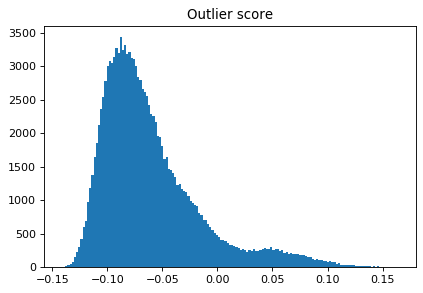

In [105]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [103]:
# Determine the threshold
threshold = np.percentile(train_scores, 95)  # Adjust the percentile as needed

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,DRG,Provider_Id,Provider_Name,Provider_City,Provider_State,Hospital_referral_region_desp,Total_Discharges,...,Average_Total_Payments_State_Avg,Provider_Payment_Difference,DRG_Payment_Ratio,Average_Total_Payments_DRG_Avg,DRG_Count_in_State,Citywise_Average_Medicare_Payment,Statewise_Max_Total_Payments,DRGwise_Min_Medicare_Payment,Hospital_Service_Volume,Anomaly_Score
0,Normal,122845,94.168736,48.32,1647.69,1634.80,965.95,24.36,153.04,42.97,...,9630.61,-231.28,0.98,8649.38,71.99,8300.71,83598.43,4239.41,3249.81,-0.07
1,Outlier,7607,5.831264,56.13,1388.50,1707.48,936.51,21.11,130.26,39.38,...,10885.05,3848.31,1.34,26759.17,82.41,11633.03,109019.05,12961.40,3866.95,0.07


The code provided implements an AutoEncoder model for outlier detection using the PyOD library. The AutoEncoder is trained on a dataset that has been preprocessed and standardized. The model architecture consists of several dense layers with dropout regularization, gradually reducing the dimensionality of the input data. The model is trained for a specified number of epochs, with the loss decreasing over time.

Once the AutoEncoder is trained, the decision_function method is used to obtain outlier scores for each sample in the dataset. The outlier scores represent the reconstruction error of the AutoEncoder, where higher scores indicate samples that deviate more from the learned patterns. These outlier scores are then normalized to the range [0, 1].

To classify samples as outliers or inliers, a threshold is defined. In this case, a threshold value of 0.0 is used, meaning that samples with outlier scores above or equal to 0.0 are classified as outliers, while scores below 0.0 are considered inliers. This threshold can be adjusted based on the specific requirements and characteristics of the dataset.

The resulting outlier labels can be used for further analysis or decision-making. Additionally, the code includes an example of how to calculate descriptive statistics based on the outlier scores and the threshold. The descriptive_stat_threshold function groups the samples into "Normal" and "Outlier" categories based on the threshold and provides summary statistics such as the count and percentage of samples in each category, as well as the average values of the features for each category.

The descriptive statistics give insights into the characteristics of the outliers compared to the normal samples. For example, in the provided output, we can see that outliers account for around 5.83% of the dataset. Comparing the average values of the features between the normal and outlier samples, we observe differences in various attributes such as DRG, Provider_Id, Provider_Name, Average_Total_Payments, Provider_Payment_Difference, and more. These differences suggest that the outliers exhibit distinct patterns or anomalies in these features compared to the normal samples.

Overall, the code implements an AutoEncoder model for outlier detection and provides a way to classify samples as outliers or inliers based on a defined threshold. The descriptive statistics give a summary of the characteristics of the outliers, which can be useful for understanding the nature of the detected anomalies and potentially taking further actions based on the insights gained.